# TinyML - XGboost (Classifier)

In [1]:
#!pip install micromlgen
#!pip install xgboost

## 1. Importing libraries

In [2]:
from micromlgen import port

import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

c:\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 2. Load Dataset

The Iris dataset is a classic dataset in the field of machine learning and statistics. It was introduced by Sir Ronald A. Fisher in 1936 as an example of discriminant analysis. The dataset is often used for educational purposes and is a common starting point for the practice of pattern classification.


Attributes:

- Sepal length (in centimeters)

- Sepal width (in centimeters)

- Petal length (in centimeters)

- Petal width (in centimeters)

Species:

- 0 - Setosa

- 1 - Versicolor

- 2 - Virginica

In [3]:
X, y = load_iris(return_X_y=True)

In [4]:
print('Input shape: ', X.shape)
print('Target variable shape: ', y.shape)

Input shape:  (150, 4)
Target variable shape:  (150,)


In [5]:
print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(y[:80])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


## 3. Split into training and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## 4. Create the classification model

In [8]:
model = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 5, n_estimators = 50)

## 5. Train the model

In [9]:
model.fit(X_train, y_train)

c:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## 6. Visualization

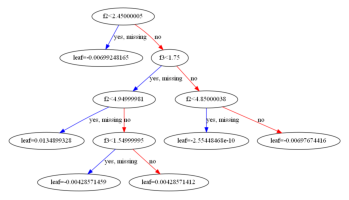

<Figure size 864x576 with 0 Axes>

In [10]:
plot_tree(model, num_trees=1, rankdir='TD')  # O argumento 'rankdir' controla a direção da árvore (LR: left to right / TD: top to down)
plt.figure(figsize=(12, 8))
plt.show()

## 7 Evaluating the model with the training data

In [11]:
training_predict = model.predict(X_train)

In [12]:
print(metrics.classification_report(y_train, training_predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        31
           1      0.972     0.946     0.959        37
           2      0.947     0.973     0.960        37

    accuracy                          0.971       105
   macro avg      0.973     0.973     0.973       105
weighted avg      0.972     0.971     0.971       105



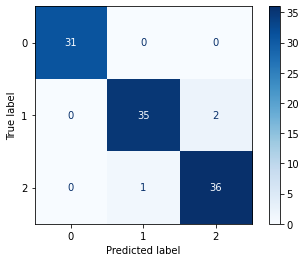

In [13]:
plot_confusion_matrix(model, X_train, y_train, cmap='Blues')

In [14]:
print(f'Model accuracy: {round(metrics.accuracy_score(y_train, training_predict)*100,2)}%')

Model accuracy: 97.14%


## 8. Evaluating the model with test data

In [15]:
test_predict = model.predict(X_test)

In [16]:
print(metrics.classification_report(y_test, test_predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        13
           2      1.000     1.000     1.000        13

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



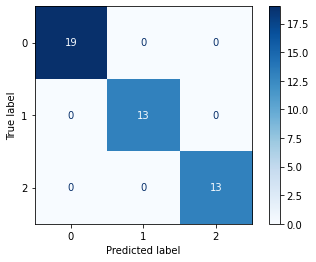

In [17]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

In [18]:
print(f'Model accuracy: {round(metrics.accuracy_score(y_test, test_predict)*100,2)}%')

Model accuracy: 100.0%


## 9. Obtaining the model to be implemented in the microcontroller

In [19]:
print(port(model))

XGBoostError: [14:07:41] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "C:\Users\Thommas\AppData\Local\Temp\tmpqdz41t2c.json": Permission denied

In [22]:
with open('./XGBoostClassifier/XGBClassifier.h', 'w') as file:
    file.write(port(model))

XGBoostError: [14:20:49] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "C:\Users\Thommas\AppData\Local\Temp\tmpq63h1m1h.json": Permission denied

XGBoostError: [13:59:25] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "C:\Users\Thommas\AppData\Local\Temp\tmp70eduwz5.json": Permission denied

## 10. Saves the template in a .h file

In [20]:
with open('random_forest_classifier.h', 'w') as file:
    file.write(port(model))